In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [36]:
path='D:\PythonWorkSpace\pythonProject\machineLearning\DataSet\logictis.txt'
data_init = pd.read_csv(path, header=None, names=['x1', 'x2', 'Accepted'])
data_init.head()

,x1,x2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


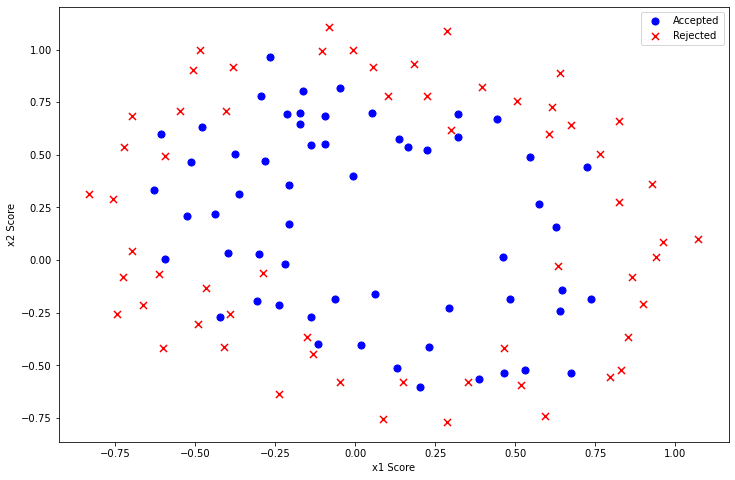

In [37]:
positive2 = data_init[data_init['Accepted'].isin([1])]
negative2 = data_init[data_init['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['x1'], positive2['x2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['x1'], negative2['x2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('x1 Score')
ax.set_ylabel('x2 Score')
plt.show()

#
特征映射

##特征映射<br>
以上图片显示，这个数据集不能像之前一样使用直线将两部分分割。而逻辑回归只适用于线性的分割，所以，这个数据集不适合直接使用逻辑回归。

## 特征映射
以上图片显示，这个数据集不能像之前一样使用直线将两部分分割。而逻辑回归只适用于线性的分割，所以，这个数据集不适合直接使用逻辑回归。
一种更好的使用数据集的方式是为每组数据创造更多的特征。所以我们为每组添加了最高x1,x2到6次幂的特征

In [38]:
degree = 6
data2 = data_init
x1 = data2['x1']
x2 = data2['x2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree+1):
    for j in range(0, i+1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('x1', axis=1, inplace=True)
data2.drop('x2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


##  代价函数和梯度


In [39]:
# 实现正则化的代价函数
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [60]:
# 实现正则化的梯度函数
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
# parameters表示theta中参数的个数 ravel（）函数将theta展成一维    
    parameters = int(theta.ravel().shape[1])
# 初始化梯度grad
    grad = np.zeros(parameters)
    
# error 为m*1的数组，记录m个样本的误差
    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
# np.multiply()函数，数组和矩阵对应位置相乘，输出与相乘数组/矩阵的大小一致
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [53]:
# 初始化X，y，θ
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
theta2 = np.zeros(cols-1)
print(theta2)

# 进行类型转换
X2 = np.array(X2.values)
y2 = np.array(y2.values)

# λ设为1
learningRate = 1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [54]:
# 实现sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [57]:
# 计算初始代价
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

In [61]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516292,
        -1.45817009, -0.05098418, -0.61558552, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603296, -0.04466179, -0.27778953, -0.29539513,
        -0.45645981, -1.04319155,  0.02779373, -0.29244872,  0.01555761,
        -0.32742406, -0.1438915 , -0.92467487]),
 32,
 1)

In [63]:
# 定义预测函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [64]:
# 计算准确率
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 98%


## 画出决策的曲线

In [66]:
def hfunc2(theta, x1, x2):
    temp = theta[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp+= np.power(x1, i-j) * np.power(x2, j) * theta[0][place+1]
            place+=1
    return temp

In [67]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfunc2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

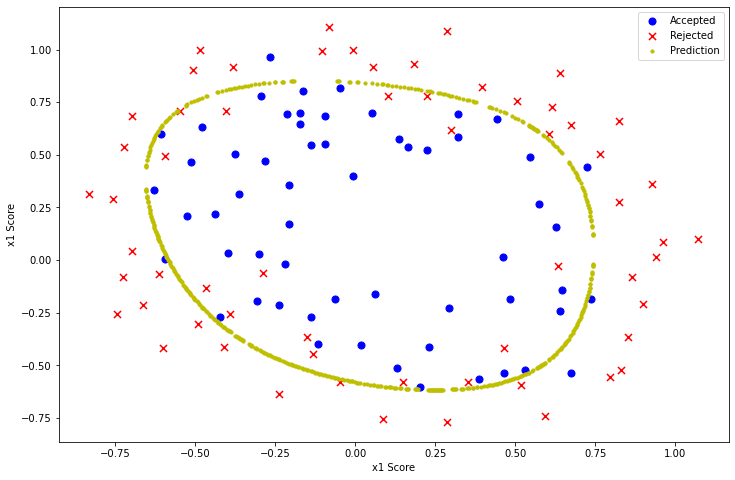

In [71]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['x1'], positive2['x2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['x1'], negative2['x2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('x1 Score')
ax.set_ylabel('x1 Score')

x, y = find_decision_boundary(result2)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.savefig(r'C:\Users\故木晨曦\Desktop\研究生文件\实验截图\第10周\logistic.png')
plt.show()

## 改变λ，观察决策曲线
### λ=0时过拟合


In [72]:
learningRate2 = 0
result3 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate2))

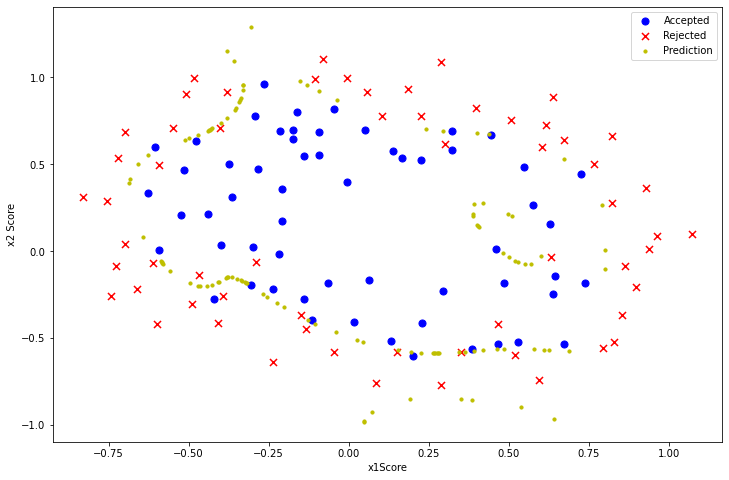

In [77]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['x1'], positive2['x2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['x1'], negative2['x2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('x1Score')
ax.set_ylabel('x2 Score')

x, y = find_decision_boundary(result3)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.savefig(r'C:\Users\故木晨曦\Desktop\研究生文件\实验截图\第10周\logistic1.png')
plt.show()

###  λ=100时欠拟合 ，λ过大导致正则化项过小，对代价函数影响较小。

In [78]:
learningRate3 = 100
result4 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate3))

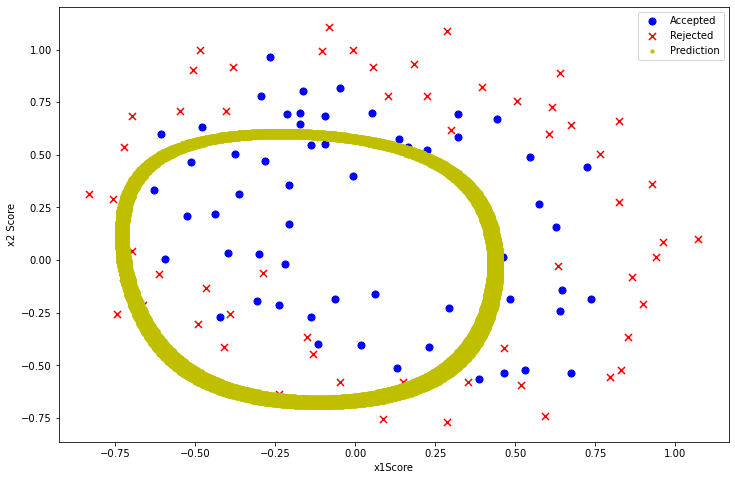

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['x1'], positive2['x2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['x1'], negative2['x2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('x1Score')
ax.set_ylabel('x2 Score')

x, y = find_decision_boundary(result4)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.savefig(r'C:\Users\故木晨曦\Desktop\研究生文件\实验截图\第10周\logistic02.png')
plt.show()